In [3]:
#REF https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [11]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data.head()
data = data[['text','sentiment']]
data.describe()

,text,sentiment
count,13871,13871
unique,10402,3
top,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
freq,161,8493


In [4]:
data2 = pd.read_csv('Sentiment.csv')
data2.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [6]:
data2.describe()

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [8]:
grouped2=data2.groupby('tweet_location')

grouped2.aggregate(np.sum)
grouped2.describe()

id                                      \
                               count          mean          std      min   
tweet_location                                                             
                                 7.0  10717.428571  2115.604237   7188.0   
           Southern California   1.0  11978.000000          NaN  11978.0   
          In GOD We Trust, USA   4.0  11398.000000  1843.644398   8690.0   
   Buckeye State                 1.0  12229.000000          NaN  12229.0   
  #mimimiles ▪ michigan          1.0   1542.000000          NaN   1542.0   
...                              ...           ...          ...      ...   
✨ the grumpiest dragon ✨         1.0   1766.000000          NaN   1766.0   
❤ USA                            1.0   8528.000000          NaN   8528.0   
⭕️-H-I-⭕️                        1.0   2600.000000          NaN   2600.0   
カリ州ド田舎の秘密基地                    2.0   6178.000000   189.504617   6044.0   
哈尔滨—青岛(✓)—魔都—帝都                  1.0   1634.000000          NaN   1634.0   

                                                                      \
                                     25%      50%       75%      max   
tweet_location                                                         
                                 9575.00  11603.0  12064.00  12953.0   
           Southern California  11978.00  11978.0  11978.00  11978.0   
          In GOD We Trust, USA  11002.25  12154.0  12549.75  12594.0   
   Buckeye State                12229.00  12229.0  12229.00  12229.0   
  #mimimiles ▪ michigan          1542.00   1542.0   1542.00   1542.0   
...                                  ...      ...       ...      ...   
✨ the grumpiest dragon ✨         1766.00   1766.0   1766.00   1766.0   
❤ USA                            8528.00   8528.0   8528.00   8528.0   
⭕️-H-I-⭕️                        2600.00   2600.0   2600.00   2600.0   
カリ州ド田舎の秘密基地                    6111.00   6178.0   6245.00   6312.0   
哈尔滨—青岛(✓)—魔都—帝都                  1634.00   1634.0   1634.00   1634.0   

                               candidate_confidence            ...  \
                                              count      mean  ...   
tweet_location                                                 ...   
                                                7.0  1.000000  ...   
           Southern California                  1.0  1.000000  ...   
          In GOD We Trust, USA                  4.0  0.573325  ...   
   Buckeye State                                1.0  1.000000  ...   
  #mimimiles ▪ michigan                         1.0  1.000000  ...   
...                                             ...       ...  ...   
✨ the grumpiest dragon ✨                        1.0  0.449800  ...   
❤ USA                                           1.0  1.000000  ...   
⭕️-H-I-⭕️                                       1.0  1.000000  ...   
カリ州ド田舎の秘密基地                                   2.0  0.732100  ...   
哈尔滨—青岛(✓)—魔都—帝都                                 1.0  1.000000  ...   

                               retweet_count        tweet_id                \
                                         75%    max    count          mean   
tweet_location                                                               
                                       69.00   78.0      7.0  6.295177e+17   
           Southern California        134.00  134.0      1.0  6.294791e+17   
          In GOD We Trust, USA        145.25  155.0      4.0  6.294902e+17   
   Buckeye State                      172.00  172.0      1.0  6.294782e+17   
  #mimimiles ▪ michigan                 1.00    1.0      1.0  6.296935e+17   
...                                      ...    ...      ...           ...   
✨ the grumpiest dragon ✨              122.00  122.0      1.0  6.296929e+17   
❤ USA                                  72.00   72.0      1.0  6.295514e+17   
⭕️-H-I-⭕️                               1.00    1.0      1.0  6.296907e+17   
カリ州ド田舎の秘密基地                           2.7

In [53]:
grouped=data.groupby('sentiment')

grouped.aggregate(np.sum)
grouped.describe()

#grouped.sum().plot(kind='pie', figsize=[5,5], counterclock=True, 
#                                  startangle=90, legend=True, title='diff',subplots=True)

text                                                                                                                                                          
          count unique                                                                                                                                           top freq
sentiment                                                                                                                                                                
Negative   8493   6129                         RT @RWSurferGirl: Jeb Bush reminds me of elevator music. You hear it but you don't listen. 🇺🇸 #GOPDebate  #GOPDebates  159
Neutral    3142   2729                                                                                         RT @ericstonestreet: Trump has Cam hands. #GOPDebates   33
Positive   2236   1709  RT @RWSurferGirl: I think Cruz and Trump need to band together and expose this set up job, and get rid of Bush and Rubio, 🇺🇸 #GOPDebate  #G…   72

In [63]:
grouped.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…,Positive
2,RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day I will rescind every illegal executive action taken by Barack Obama."" #GOPDebate @FoxNews",Positive
6,RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly https://…,Negative
7,Going on #MSNBC Live with @ThomasARoberts around 2 PM ET. #GOPDebate,Neutral
8,"Deer in the headlights RT @lizzwinstead: Ben Carson, may be the only brain surgeon who has performed a lobotomy on himself. #GOPDebate",Negative
9,RT @NancyOsborne180: Last night's debate proved it! #GOPDebate #BATsAsk @BadassTeachersA #TBATs https://t.co/G2gGjY1bJD,Negative


In [12]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

#***What is the text in twitter***

In [13]:
pd.set_option('display.width',200)
pd.set_option('display.max_colwidth',2000)
train[ train['sentiment'] == 'Positive']["text"].head(10)

3718                                       proud of the @GOP field after #GOPDebate Took tough questions and most cases knocked them out of the park. @JohnKasich @marcorubio my favs
8428                                  RT @larryelder: Trump should have said, "Megyn, ask these nine candidates, if they plan to support ME when I win the nomination."\r\n#GOPDebat…
351                                              @ChrisChristie won the #GOPDebate last night. Only candidate who answered questions directly and not afraid to take on tough issues.
8576                                              RT @BettyFckinWhite: So Donald Trump is Biff from Back to the Future 2? #GOPDebates #womensrights  #combover http://t.co/IS9GYB7P31
5993                                                              RT @Torchie123: This guy got the real shaft in the #GopDebate tonight.\r\nWHY IS THAT? \r\n# http://t.co/zw8jUPqP11
869      Debate Preformances:\r\nKasich A-\r\nRubio A-\r\nCarson B+\r\nChristie B+\r\nTrum

In [14]:
pd.set_option('display.width',200)
pd.set_option('display.max_colwidth',2000)
train[ train['sentiment'] == 'Negative']["text"].head(10)

12234      RT @RWSurferGirl: The candidates don't have to attack @realDonaldTrump Fox is doing it for them by stoping him from speaking. 🇺🇸 #GOPDebate…
7733                        @weeklystandard @JayCostTWS @realDonaldTrump your attempts to put him down are hilariously desperate. #GOPDebate #Trump2016
12006                                    the #GOPdebates makes me want to crack open my "Institutional powers and Constraints; Constitutional Law". lol
5014     Unfortunately I wasnt able to take #GOP candidates' #Abortion opinions seriously because their penises got in the way\r\n#GOPDebate #prochoice
9760       RT @SupermanHotMale: Dear friends, it may seem like this is fun to me but I'm really mad about how Republicans treat people who can't affor…
7137                                     Actually, I don't. #GOPDebate sucked, but last time I checked u weren't hurting for $$ https://t.co/WxSm51AFti
10110                           RT @RWSurferGirl: Is it just me or does anyone else want

Positive words


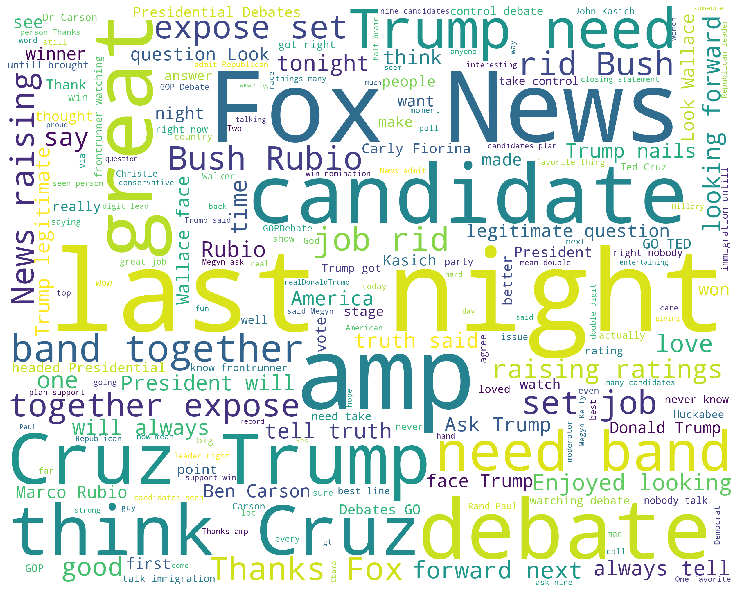

Negative words


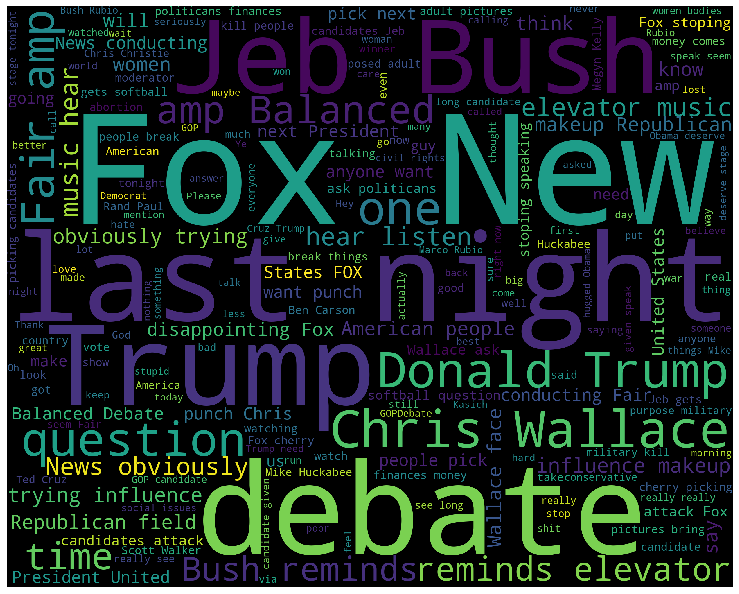

In [15]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Positive words


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56826 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56826 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56824 missing from curre

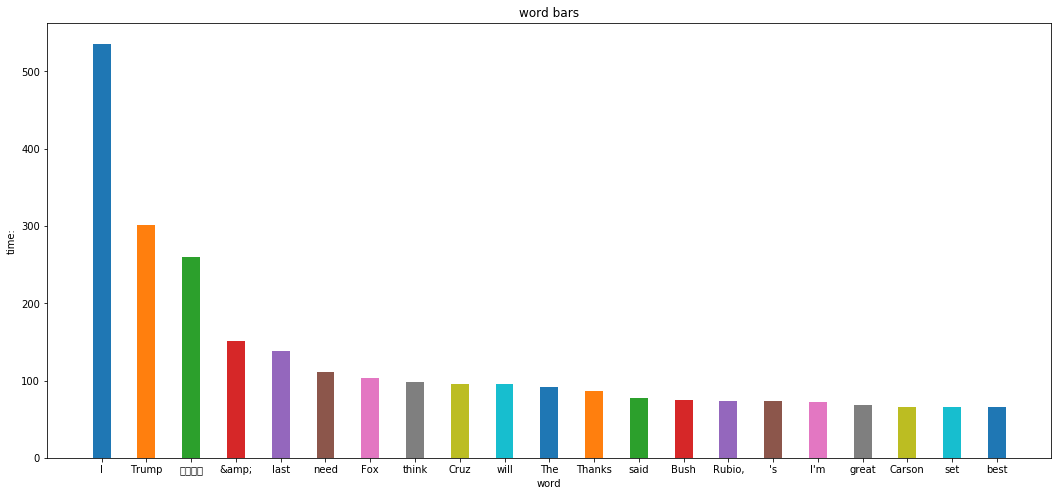

In [16]:
def get_topN(hist, num):
    return sorted(hist.items(), key=lambda x: x[1], reverse=True)[:num+1]

def wordbar_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                                and word not in STOPWORDS
                            ])
    dict_word ={}
    for word in cleaned_word.split():
        dict_word[word] = dict_word.get(word,0) + 1
        
    data = get_topN(dict_word, 20)
    #print(data)
    plt.figure(figsize=(18,8)) 
    for d in data:
        plt.bar((d[0],), (d[-1],), width=0.4)
    # 画图
    plt.xlabel('word')
    plt.ylabel('time:')
    plt.title('word bars')
    plt.show()
    
print("Positive words")
wordbar_draw(train_pos,'white')
    

Negative words


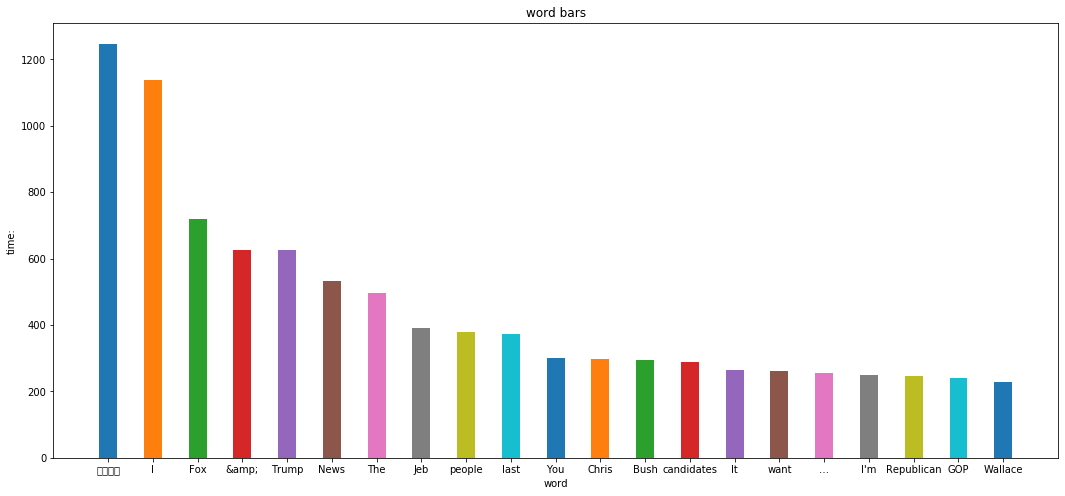

In [17]:
print("Negative words")
wordbar_draw(train_neg)

In [8]:
#import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [30]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features_freq(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    return wordlist

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))
wordsfreq = get_word_features_freq(get_words_in_tweets(tweets))


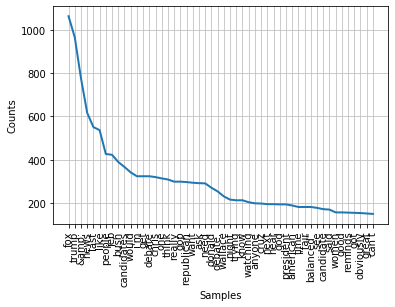

5929


In [45]:

wordsfreq.plot(50, cumulative=False)
cnt=0
for k,v in wordsfreq.items():
    if v>=2:
        cnt+=1
print(cnt)
#sorted([w for w in set(text3) if len(w) > 7 and wordsfreq[w] > 7])

In [26]:
len(w_features)

14538

In [27]:
w_features['candidates']

TypeError: 'dict_keys' object is not subscriptable

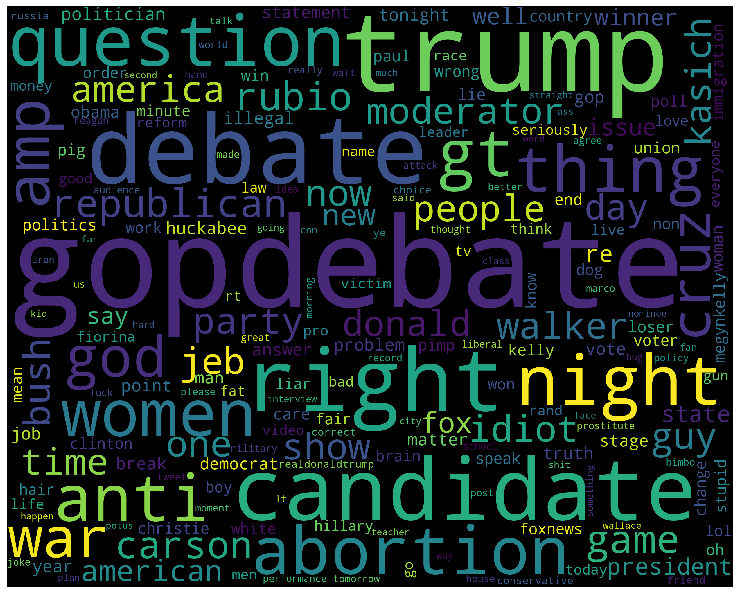

In [28]:
wordcloud_draw(w_features)